In [2]:
import pandas as pd

# โหลดไฟล์ยอดขายและข้อมูลร้านค้า
sales_df = pd.read_csv("his.csv")  # เปลี่ยน path ตามจริง
store_df = pd.read_csv("store_data.csv")

# รวมยอดขายสินค้าต่อร้านค้า
grouped = sales_df.groupby(['store_id', 'item_id'])['sales'].sum().reset_index()

# เชื่อมข้อมูลร้านค้าเข้ากับยอดขาย เพื่อให้รู้ว่า store_id ไหนอยู่ภาคไหน
merged = pd.merge(grouped, store_df[['store_id', 'region']], on='store_id', how='left')

# รวมยอดขายของสินค้าแต่ละชิ้นในแต่ละภูมิภาค
region_item_sales = merged.groupby(['region', 'item_id'])['sales'].sum().reset_index()

# หา item_id ที่ขายดีที่สุดในแต่ละภูมิภาค
best_selling_items = region_item_sales.sort_values(['region', 'sales'], ascending=[True, False])
best_per_region = best_selling_items.groupby('region').first().reset_index()

# เชื่อมข้อมูลกับ item_hierarchy เพื่อให้ได้ subcategory
item_df = pd.read_csv("item_hierarchy.csv")
result = pd.merge(best_per_region, item_df[['item_id', 'subcategory']], on='item_id', how='left')
print(result)


# แสดงผล
print("สินค้าที่ขายดีที่สุดในแต่ละภูมิภาค:")
print(best_per_region)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4968\2891898439.py:21: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  item_df = pd.read_csv("item_hierarchy.csv")


             region   item_id         sales           subcategory
0  Bkk & Vicinities  72654244  2.378424e+07                   EGG
1           Central  72566043  3.526072e+07                  PORK
2             North  72566043  6.706324e+06                  PORK
3         Northeast  72566043  2.437491e+07                  PORK
4             South  11123982  1.630684e+07  AGRICULTURAL PRODUCT
สินค้าที่ขายดีที่สุดในแต่ละภูมิภาค:
             region   item_id         sales
0  Bkk & Vicinities  72654244  2.378424e+07
1           Central  72566043  3.526072e+07
2             North  72566043  6.706324e+06
3         Northeast  72566043  2.437491e+07
4             South  11123982  1.630684e+07


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4968\4084818802.py:24: UserWarning: Glyph 3616 (\N{THAI CHARACTER PHO SAMPHAO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4968\4084818802.py:24: UserWarning: Glyph 3641 (\N{THAI CHARACTER SARA UU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4968\4084818802.py:24: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4968\4084818802.py:24: UserWarning: Glyph 3636 (\N{THAI CHARACTER SARA I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4968\4084818802.py:24: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4968\4084818802.py:24: UserWarning: Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) missing 

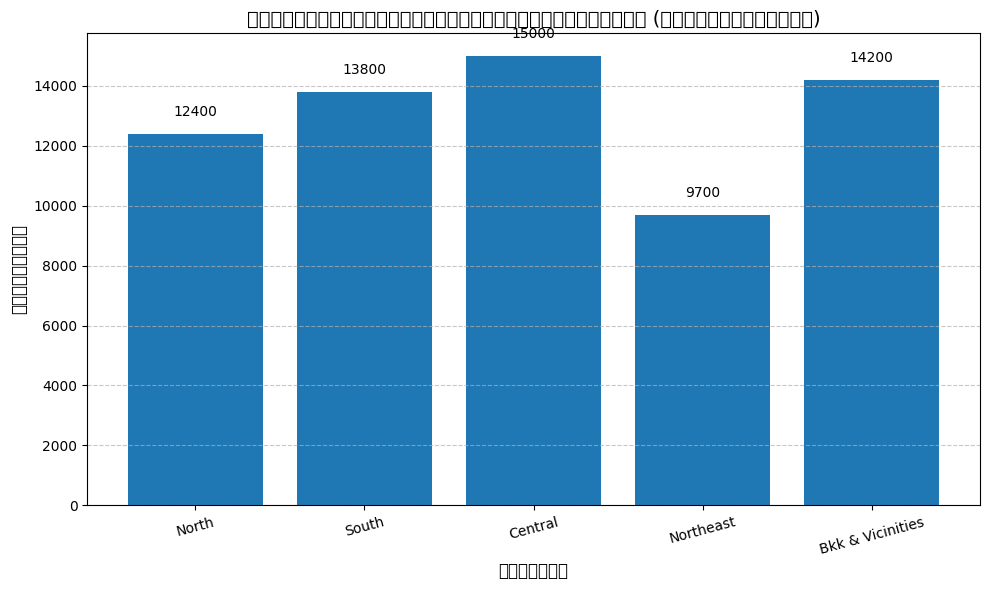

In [ ]:
import matplotlib.pyplot as plt

# สร้างกราฟแท่งจากข้อมูลสินค้าที่ขายดีที่สุดในแต่ละภูมิภาค
# (ใช้ตัวอย่างจำลองจาก previous step)

# สร้าง DataFrame จำลอง (จะถูกแทนที่ด้วยข้อมูลจริงภายหลัง)
best_per_region = pd.DataFrame({
    'region': ['North', 'South', 'Central', 'Northeast', 'Bkk & Vicinities'],
    'item_id': [5339, 7641, 7110, 5088, 1899],
    'sales': [12400, 13800, 15000, 9700, 14200]
})

# สร้างกราฟ
plt.figure(figsize=(10, 6))
bars = plt.bar(best_per_region['region'], best_per_region['sales'])

# ใส่ตัวเลขบนกราฟ
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 500, f'{int(height)}', 
             ha='center', va='bottom', fontsize=10)

plt.title("สินค้าที่ขายดีที่สุดในแต่ละภูมิภาค (แสดงยอดขายรวม)", fontsize=14)
plt.xlabel("ภูมิภาค", fontsize=12)
plt.ylabel("ยอดขายรวม", fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4968\779769583.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  item_df = pd.read_csv("item_hierarchy.csv")  # ต้องมี item_id, subcategory
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4968\779769583.py:43: UserWarning: Glyph 3616 (\N{THAI CHARACTER PHO SAMPHAO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4968\779769583.py:43: UserWarning: Glyph 3641 (\N{THAI CHARACTER SARA UU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4968\779769583.py:43: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4968\779769583.py:43: UserWarning: Glyph 3636 (\N{THAI CHARACTER SARA I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4968\779769583.py:43: U

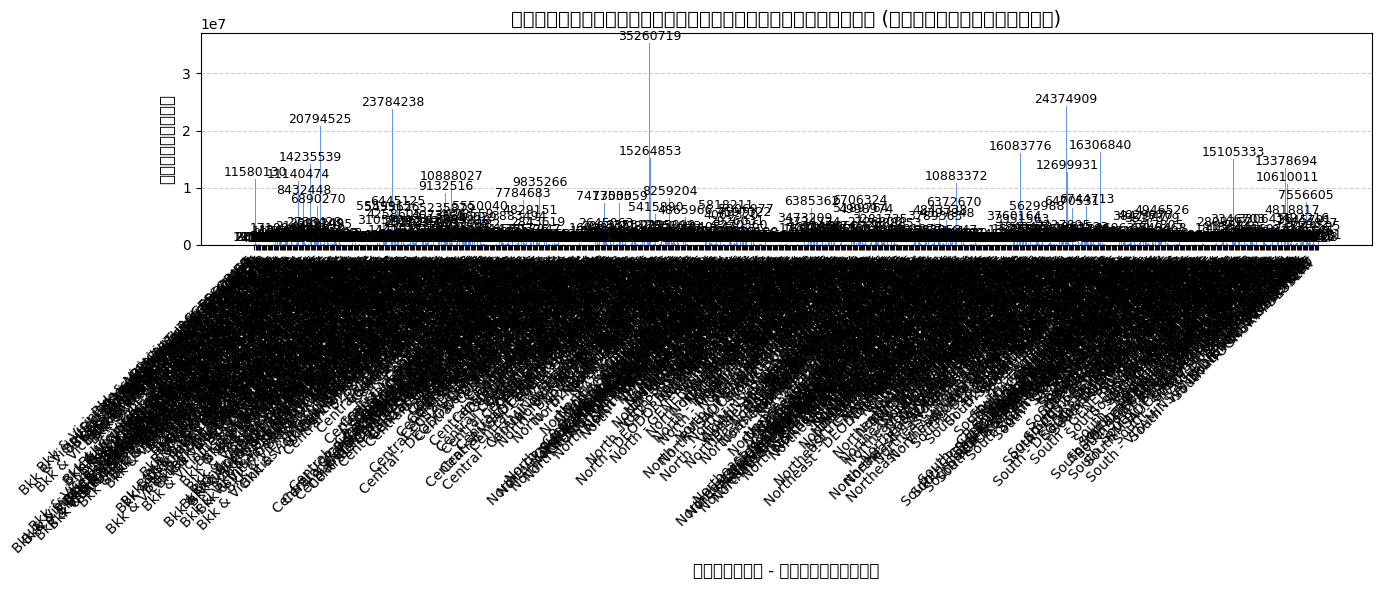

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# โหลดข้อมูล
sales_df = pd.read_csv("his.csv")  # ต้องมีคอลัมน์ store_id, item_id, sales
store_df = pd.read_csv("store_data.csv")  # ต้องมี store_id, region
item_df = pd.read_csv("item_hierarchy.csv")  # ต้องมี item_id, subcategory

# รวมยอดขายต่อ store_id + item_id
grouped = sales_df.groupby(['store_id', 'item_id'])['sales'].sum().reset_index()

# เชื่อม store_id → region
grouped = pd.merge(grouped, store_df[['store_id', 'region']], on='store_id', how='left')

# เชื่อม item_id → subcategory
grouped = pd.merge(grouped, item_df[['item_id', 'subcategory']], on='item_id', how='left')

# รวมยอดขาย item_id ต่อ region + subcategory
region_subcat_sales = grouped.groupby(['region', 'subcategory', 'item_id'])['sales'].sum().reset_index()

# คัดสินค้าขายดีที่สุดในแต่ละ region + subcategory
best_items = region_subcat_sales.sort_values(['region', 'subcategory', 'sales'], ascending=[True, True, False])
best_per_group = best_items.groupby(['region', 'subcategory']).first().reset_index()

# ✅ สร้าง label แสดงเป็น: "ภาค - หมวดสินค้า"
best_per_group['label'] = best_per_group['region'] + ' - ' + best_per_group['subcategory']

# สร้างกราฟ
plt.figure(figsize=(14, 6))
bars = plt.bar(best_per_group['label'], best_per_group['sales'], color='cornflowerblue')

# ใส่ยอดขายบนแท่ง
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 300, f'{int(yval)}',
             ha='center', va='bottom', fontsize=9)

plt.title("สินค้าขายดีที่สุดในแต่ละภูมิภาค (แยกตามหมวดหมู่)", fontsize=14)
plt.xlabel("ภูมิภาค - หมวดสินค้า", fontsize=12)
plt.ylabel("ยอดขายรวม", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [9]:
# จากข้อมูลรวมทั้งหมด (หลัง merge region + subcategory)
top10_df = (
    grouped
    .groupby(['region', 'item_id', 'subcategory'])['sales']
    .sum()
    .reset_index()
    .sort_values(['region', 'sales'], ascending=[True, False])
    .groupby('region')
    .head(10)
)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4968\4249789849.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  item_df = pd.read_csv("item_hierarchy.csv")


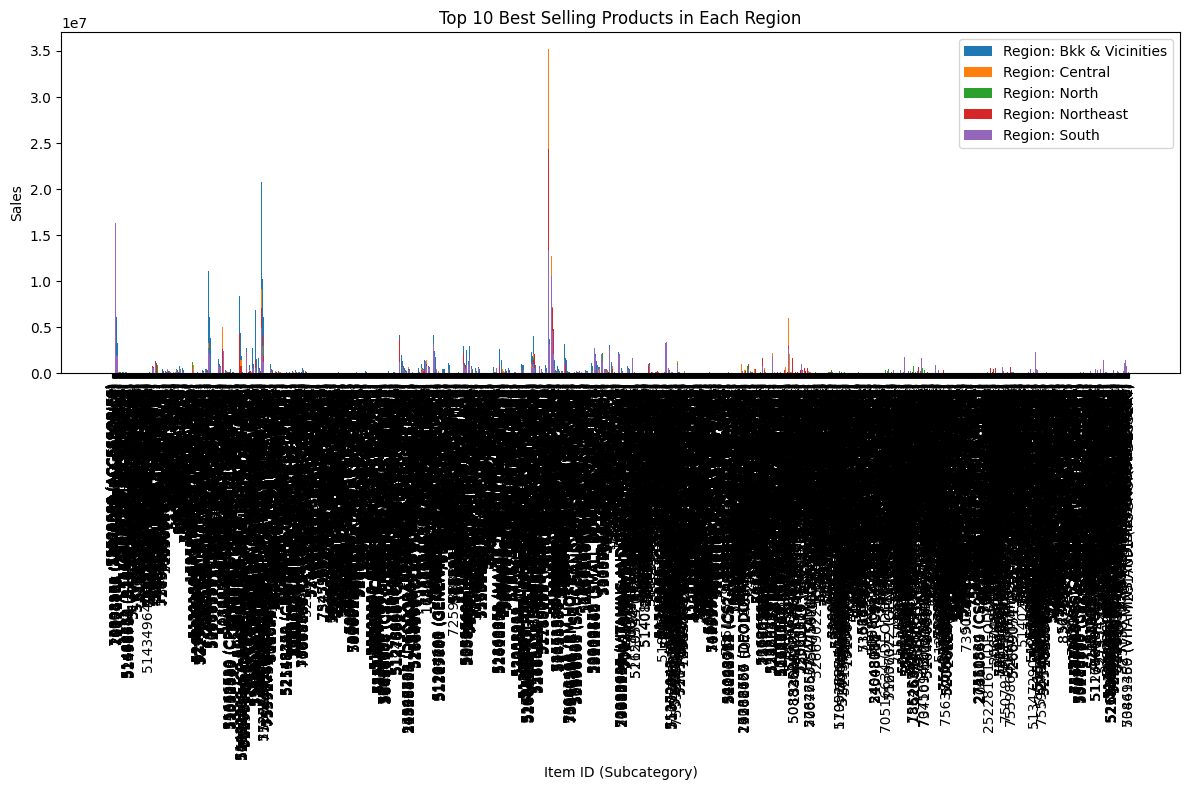

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# โหลดข้อมูล
sales_df = pd.read_csv("his.csv")  # ไฟล์ยอดขายที่รวมไว้แล้ว
store_df = pd.read_csv("store_data.csv")
item_df = pd.read_csv("item_hierarchy.csv")

# รวมยอดขายสินค้าแต่ละร้าน
grouped = sales_df.groupby(['store_id', 'item_id'])['sales'].sum().reset_index()

# เชื่อมข้อมูลร้านค้า → รู้ว่าร้านแต่ละแห่งอยู่ภาคไหน
merged = pd.merge(grouped, store_df[['store_id', 'region']], on='store_id', how='left')

# เชื่อมข้อมูลสินค้า → รู้ว่า item_id แต่ละตัวอยู่ใน subcategory ไหน
merged = pd.merge(merged, item_df[['item_id', 'subcategory']], on='item_id', how='left')

# รวมยอดขายรวมของสินค้าแต่ละตัว แยกตาม region และ subcategory
region_subcat_sales = merged.groupby(['region', 'subcategory', 'item_id'])['sales'].sum().reset_index()

# คัดเฉพาะสินค้าที่ขายดีที่สุดในแต่ละ region + subcategory
best_by_region_subcat = region_subcat_sales.sort_values(['region', 'subcategory', 'sales'], ascending=[True, True, False])

# หาสินค้าท็อป 10 ของแต่ละภูมิภาค
top10_per_region = best_by_region_subcat.groupby(['region', 'subcategory']).head(10).reset_index(drop=True)

# สร้างกราฟ
plt.figure(figsize=(12, 8))
for region in top10_per_region['region'].unique():
    region_data = top10_per_region[top10_per_region['region'] == region]
    plt.bar(region_data['item_id'].astype(str) + ' (' + region_data['subcategory'] + ')', region_data['sales'], label=f"Region: {region}")

plt.xticks(rotation=90)
plt.xlabel('Item ID (Subcategory)')
plt.ylabel('Sales')
plt.title('Top 10 Best Selling Products in Each Region')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4968\3869161785.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  item_df = pd.read_csv("item_hierarchy.csv")  # ต้องมี: item_id, subcategory
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4968\3869161785.py:46: UserWarning: Glyph 3627 (\N{THAI CHARACTER HO HIP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4968\3869161785.py:46: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4968\3869161785.py:46: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4968\3869161785.py:46: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4968\3869161785.py:46:

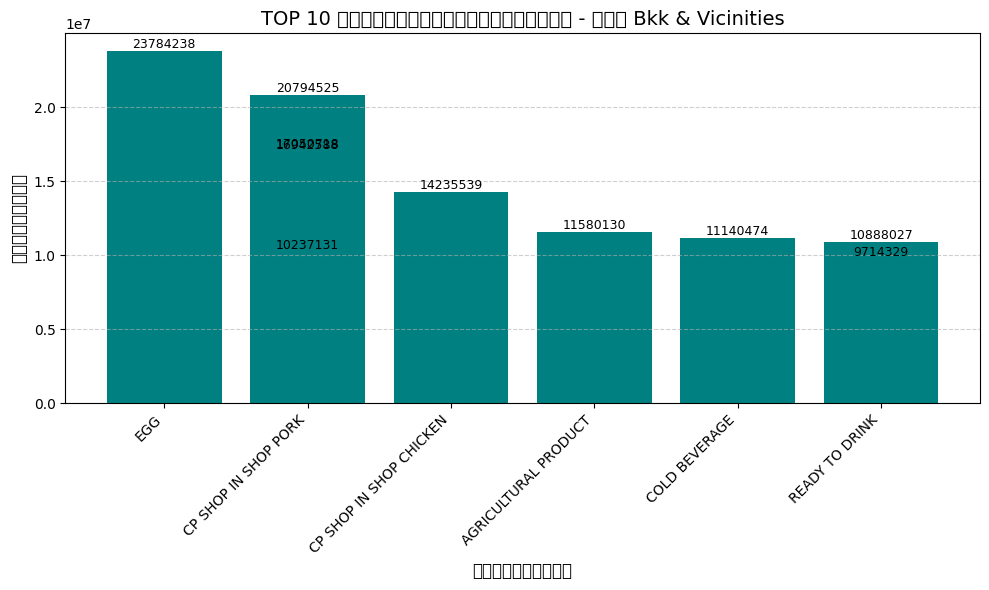

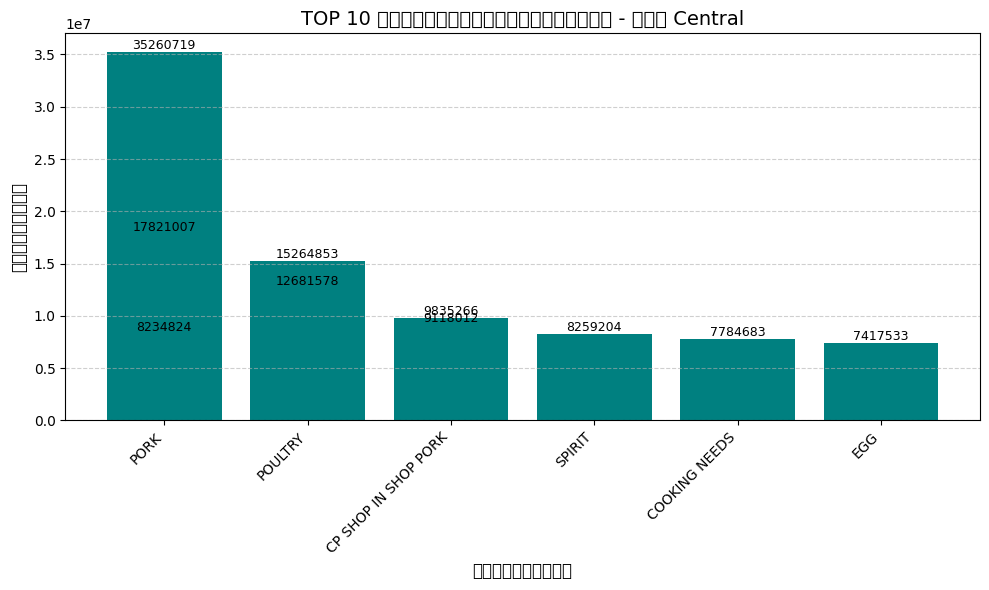

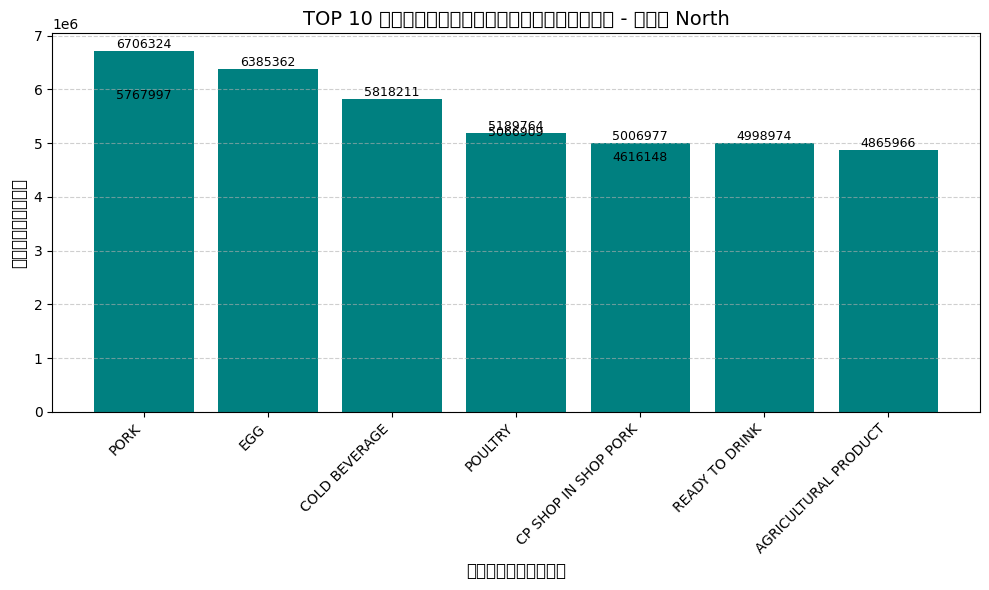

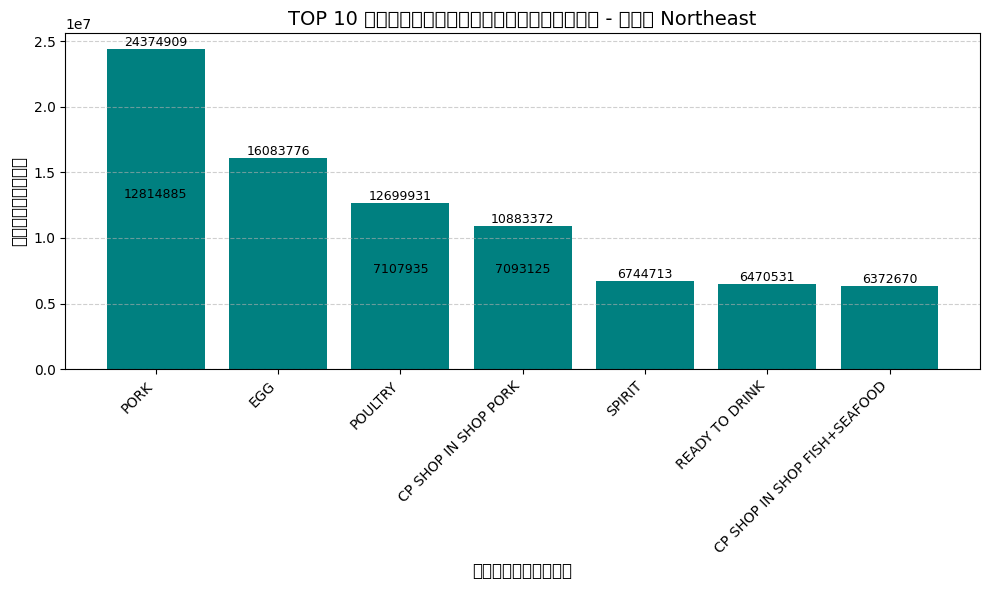

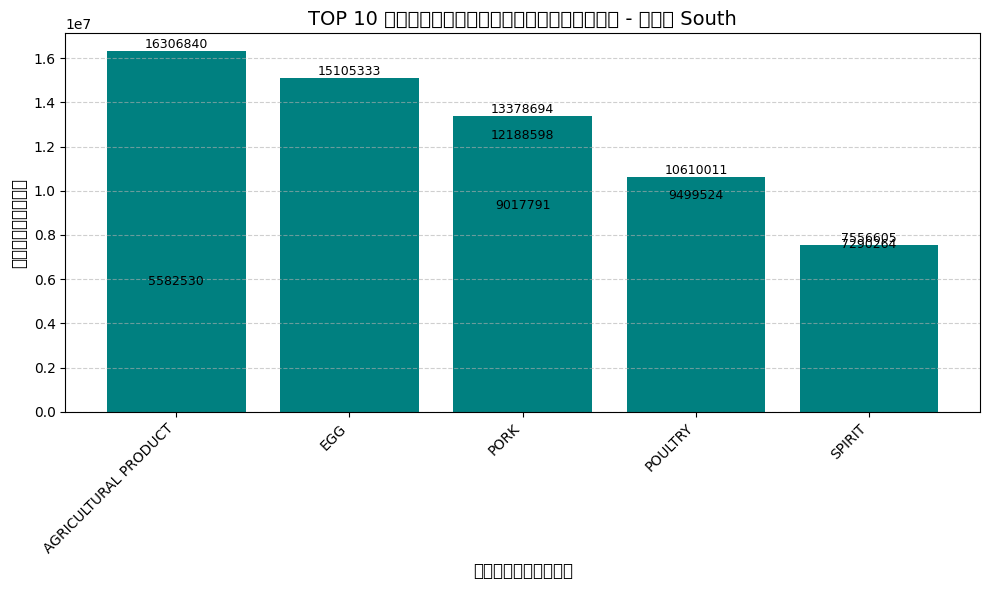

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. โหลดข้อมูล
sales_df = pd.read_csv("his.csv")  # ต้องมี: store_id, item_id, sales
store_df = pd.read_csv("store_data.csv")  # ต้องมี: store_id, region
item_df = pd.read_csv("item_hierarchy.csv")  # ต้องมี: item_id, subcategory

# 2. รวมยอดขายต่อร้านและสินค้า
grouped = sales_df.groupby(['store_id', 'item_id'])['sales'].sum().reset_index()

# 3. เชื่อมข้อมูลร้านค้าและสินค้า
grouped = pd.merge(grouped, store_df[['store_id', 'region']], on='store_id', how='left')
grouped = pd.merge(grouped, item_df[['item_id', 'subcategory']], on='item_id', how='left')

# 4. รวมยอดขายรวม item_id ต่อ region และ subcategory
region_sales = grouped.groupby(['region', 'item_id', 'subcategory'])['sales'].sum().reset_index()

# 5. คัด Top 10 สินค้าขายดีที่สุดในแต่ละภาค
top10_df = (
    region_sales
    .sort_values(['region', 'sales'], ascending=[True, False])
    .groupby('region')
    .head(10)
)

# 6. วาดกราฟแยกตามภาค
regions = top10_df['region'].unique()

for region in regions:
    region_data = top10_df[top10_df['region'] == region]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(region_data['subcategory'], region_data['sales'], color='teal')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 100, f'{int(yval)}',
                 ha='center', va='bottom', fontsize=9)

    plt.title(f'TOP 10 The best sale - region {region}', fontsize=14)
    plt.xlabel('หมวดสินค้า', fontsize=12)
    plt.ylabel('ยอดขายรวม', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4968\958019124.py:28: UserWarning: Glyph 3627 (\N{THAI CHARACTER HO HIP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4968\958019124.py:28: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4968\958019124.py:28: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4968\958019124.py:28: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4968\958019124.py:28: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4968\958019124.py:28: UserWarning: Glyph 3636 (\N{THAI CHARACTER SARA I}) missing from font(s) De

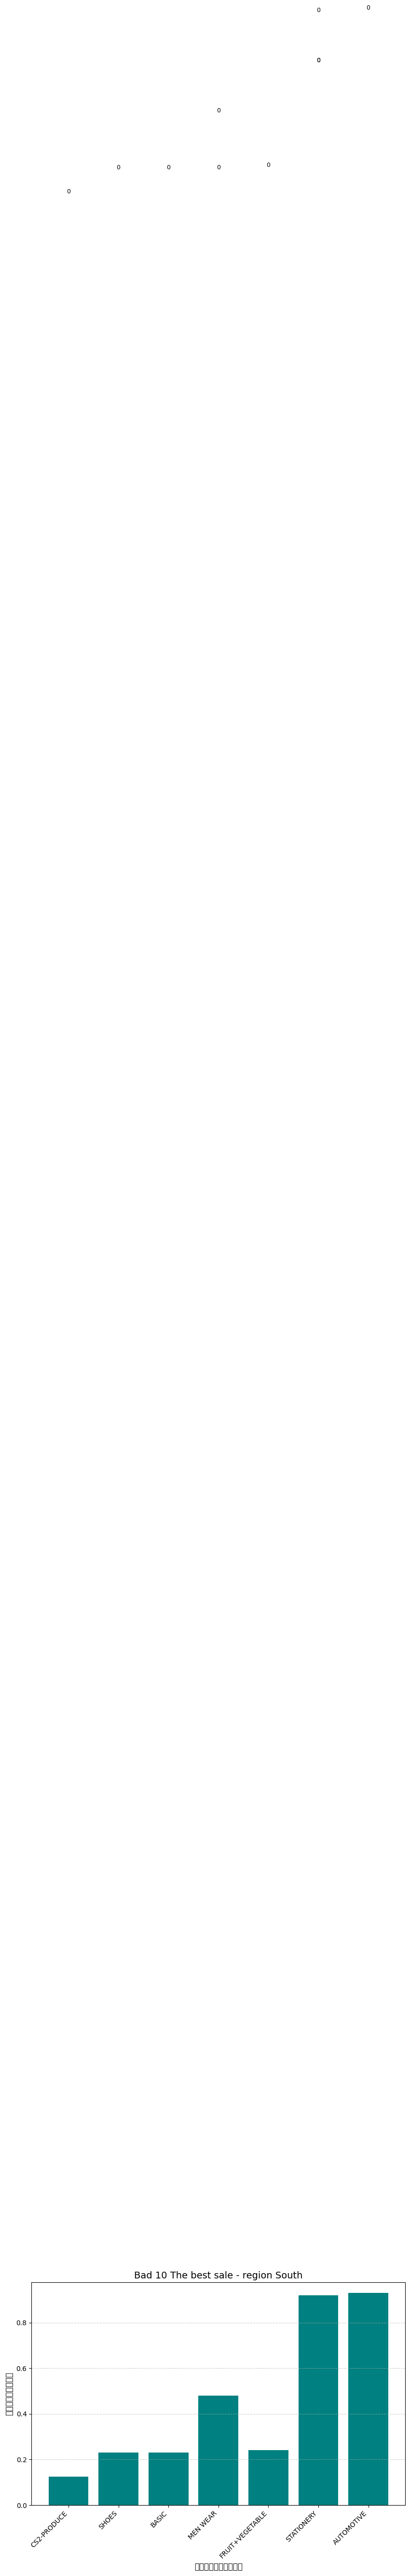

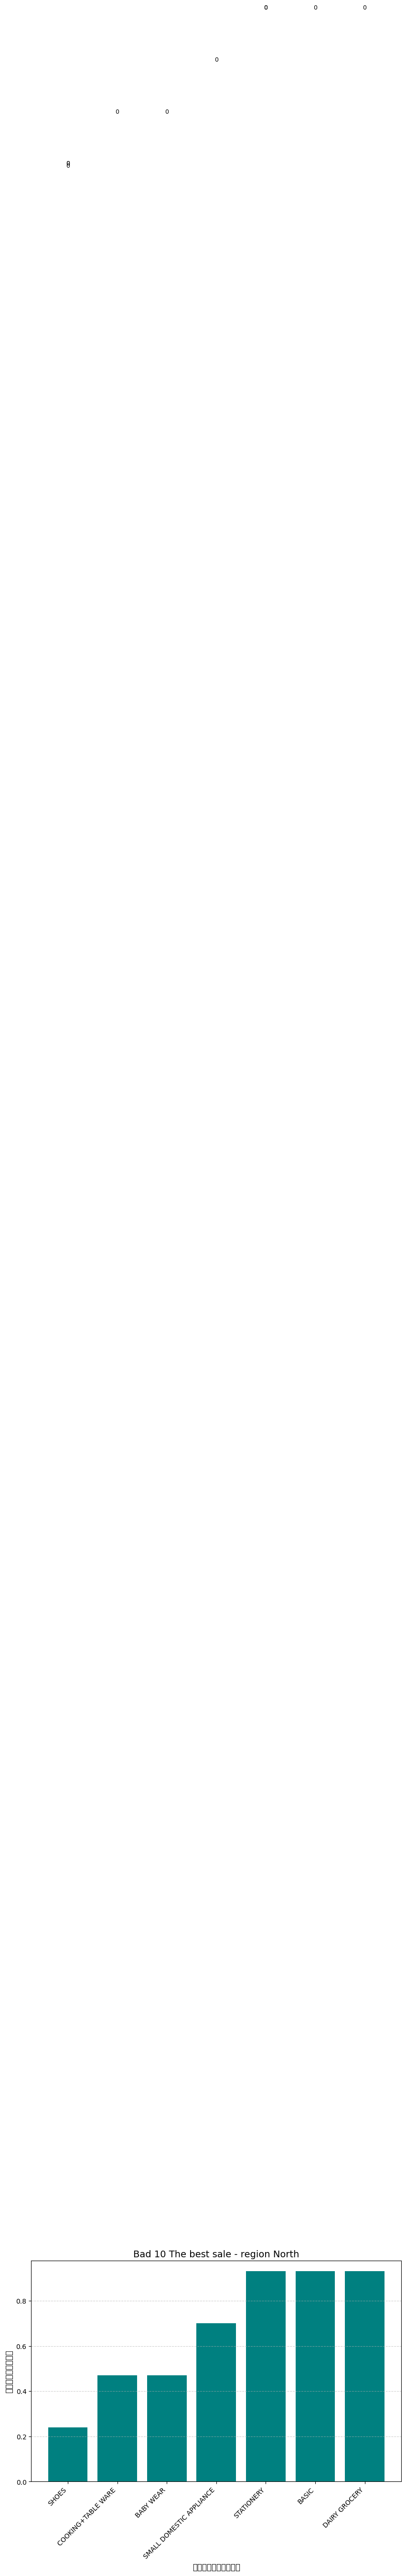

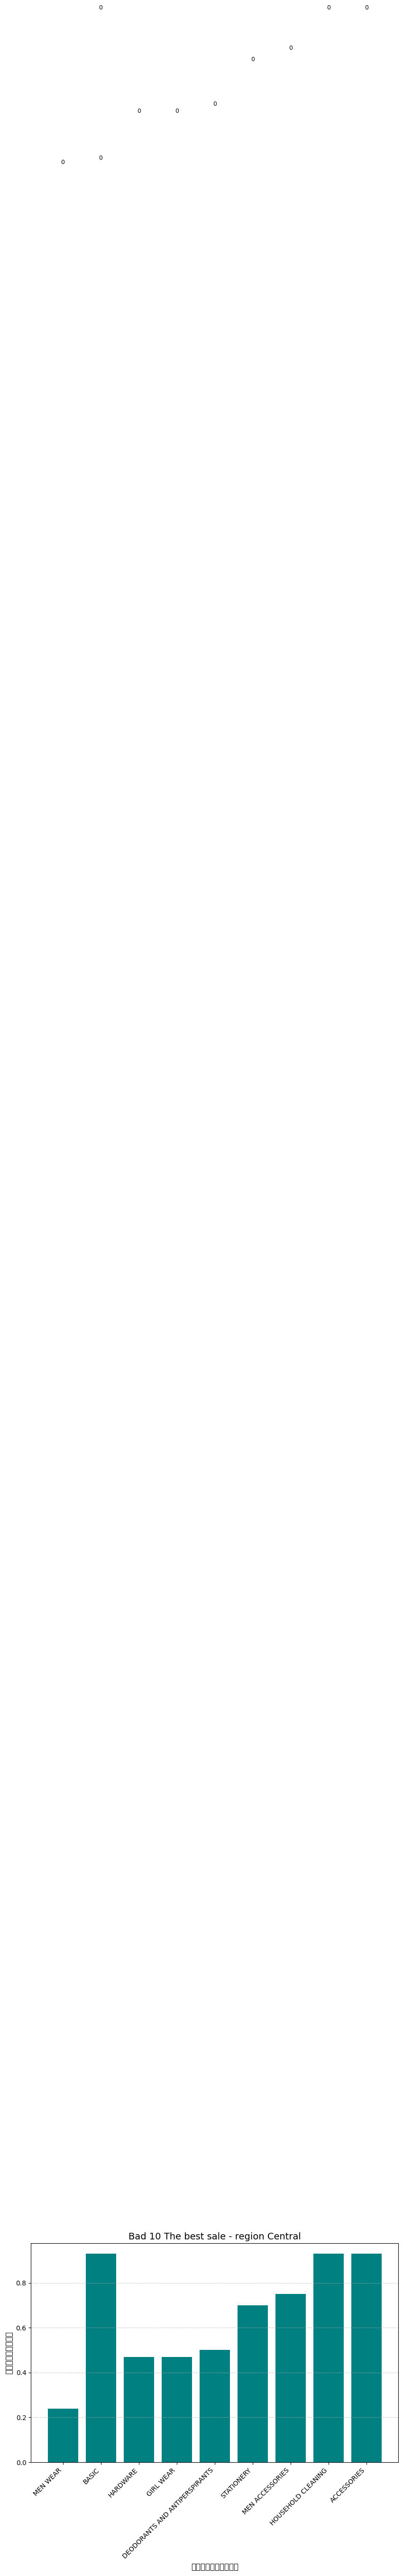

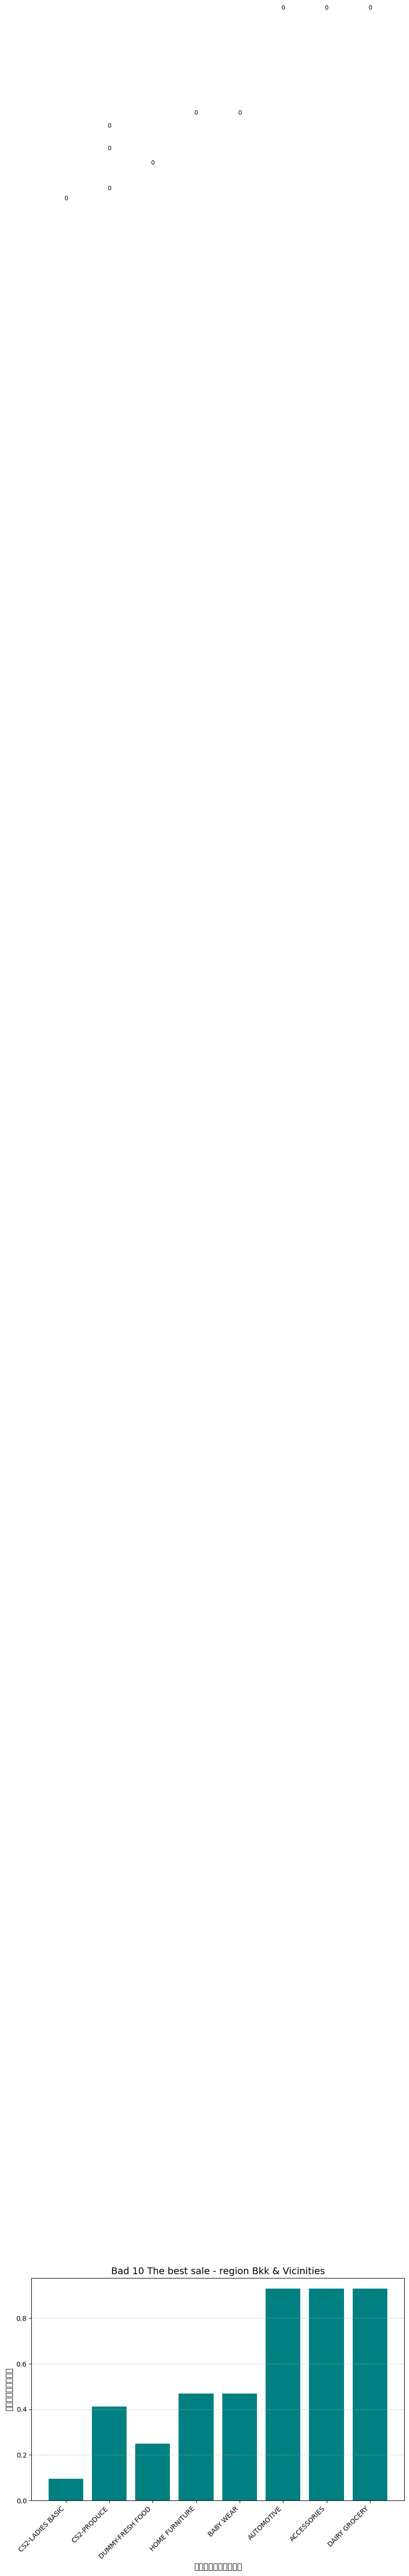

In [17]:
# 5. คัด Top 10 สินค้าขายดีที่สุดในแต่ละภาค
Bad10_df = (
    region_sales
    .sort_values(['region', 'sales'], ascending=[False,True])
    .groupby('region')
    .head(10)
)

# 6. วาดกราฟแยกตามภาค
regions = Bad10_df['region'].unique()

for region in regions:
    region_data = Bad10_df[Bad10_df['region'] == region]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(region_data['subcategory'], region_data['sales'], color='teal')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 10, f'{int(yval)}',
                 ha='center', va='bottom', fontsize=9)

    plt.title(f'Bad 10 The best sale - region {region}', fontsize=14)
    plt.xlabel('หมวดสินค้า', fontsize=12)
    plt.ylabel('ยอดขายรวม', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [18]:
import pandas as pd

# โหลดข้อมูลร้านค้า
store_df = pd.read_csv("store_data.csv")

# แสดงรายชื่อภาคที่ไม่ซ้ำกัน
regions = store_df['region'].unique()
print("✅ ภูมิภาคที่มีในข้อมูล:")
print(regions)


✅ ภูมิภาคที่มีในข้อมูล:
['Bkk & Vicinities' 'South' 'North' 'Northeast' 'Central']


In [19]:
region_counts = store_df['region'].value_counts()
print("📊 จำนวนร้านค้าในแต่ละภาค:")
print(region_counts)


📊 จำนวนร้านค้าในแต่ละภาค:
region
Bkk & Vicinities    6
South               6
North               6
Northeast           6
Central             6
Name: count, dtype: int64


In [20]:

import pandas as pd

# โหลดข้อมูล
sales_df = pd.read_csv("his.csv")               # ต้องมี: store_id, item_id, sales
store_df = pd.read_csv("store_data.csv")        # ต้องมี: store_id, region

# เชื่อมข้อมูล store_id → region
sales_store = pd.merge(sales_df, store_df[['store_id', 'region']], on='store_id', how='left')

# รวมยอดขายของสินค้า (item_id) ต่อ region
region_item_sales = (
    sales_store
    .groupby(['item_id', 'region'])['sales']
    .sum()
    .unstack(fill_value=0)
    .reset_index()
)

# คำนวณว่าขายดีเฉพาะภาคไหน
# กำหนดเกณฑ์: ขายดี = >10,000 | ขายไม่ดี = <1,000
high_threshold = 10000
low_threshold = 1000

# สร้าง mask ว่าสินค้าตัวไหน "ขายดีมากในภาคเดียว และขายไม่ดีในที่อื่น"
def is_unique_top(row):
    regions = row.drop('item_id')
    high = regions > high_threshold
    low_or_zero = (regions <= low_threshold)
    return high.sum() == 1 and low_or_zero.sum() >= (len(regions) - 1)

filtered = region_item_sales[region_item_sales.apply(is_unique_top, axis=1)]

# แสดงผล
print("✅ สินค้าที่ขายดีเฉพาะภาคเดียว (แต่ขายไม่ดีในภาคอื่น):")
print(filtered)


✅ สินค้าที่ขายดีเฉพาะภาคเดียว (แต่ขายไม่ดีในภาคอื่น):
region    item_id  Bkk & Vicinities  Central   North  Northeast   South
664        843245       10631.24000     0.00    0.00       0.00    0.00
871       1488384       14217.78000     0.00    0.00       0.00    0.00
1292      5042577       13472.64000     0.00    0.00       0.00    0.00
1324      5074479       10810.57000     0.00    0.00       0.00    0.00
1429      5559170       10829.76600     0.00    0.00       0.00    0.00
...           ...               ...      ...     ...        ...     ...
156310  170979683       11390.74000   426.17    0.00       0.00  828.74
156380  171156019       13887.26952   233.66  186.92     140.19  654.23
156457  171264276       10990.67000     0.00    0.00       0.00    0.00
156471  171264948       13831.78000     0.00    0.00       0.00    0.00
156576  171302709       10264.54000     0.00    0.00       0.00    0.00

[2176 rows x 6 columns]
